# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [24]:
import matplotlib.pyplot as plt
import mplleaflet  #pip3 install mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.8, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(13, '31428e6fe40a3964bffbc18d60e8775fd4920c8a4489aeb2aa548b10')
leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

### Ann Arbor, Michigan, United States min_max_temperature_line_graph

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg

In [32]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df.drop("ID", axis=1, inplace=True)
df.Data_Value = df.Data_Value / 10

# Transform the date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Get the year of each measurement
df['Year'] = df['Date'].dt.year

# Get the month and day of each measurement
df['Month_Day'] = df['Date'].dt.strftime('%m-%d')

# Remove February 29
df = df[df['Month_Day']!='02-29']

# Find the record high and lows from 2005-2014
df_5_14_highs = df[(df.Year>=2005)&(df.Year<2015)&(df.Element=='TMAX')].groupby(['Month_Day'])['Data_Value'].max()
df_5_14_lows = df[(df.Year>=2005)&(df.Year<2015)&(df.Element=='TMIN')].groupby(['Month_Day'])['Data_Value'].min()

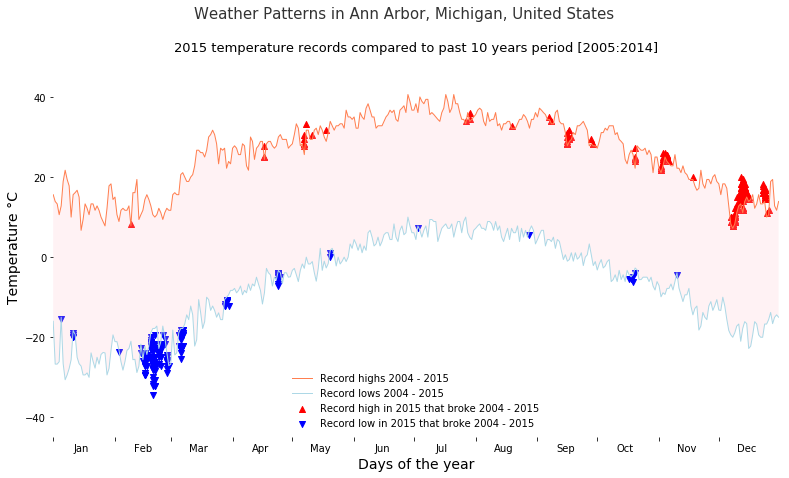

In [33]:
# create datetime index
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')


# plot high and lows
plt.figure(figsize=(13,7))

plt.plot(date_index, df_5_14_highs, color='coral',linewidth=1)
plt.plot(date_index, df_5_14_lows, color='lightblue', linewidth=1)

ax = plt.gca()
ax.axis(['2015/01/01','2015/12/31',-45,50])


# code from matplotlib.org docummentation: http://matplotlib.org/examples/pylab_examples/centered_ticklabels.html
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
 
# scatter points for 2015
df = df.merge(df_5_14_highs.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}), on='Month_Day',
              how='left')
df = df.merge(df_5_14_lows.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}), on='Month_Day',
              how='left')

breaking_high = df[(df.Year==2015)&(df.Data_Value>df.Max_temp)]
breaking_low = df[(df.Year==2015)&(df.Data_Value<df.Min_temp)]    
plt.scatter(breaking_high.Date.values, breaking_high.Data_Value.values, color='red', marker='^');
plt.scatter(breaking_low.Date.values, breaking_low.Data_Value.values, color='blue', marker='v');    

# Fill in between the high and low measurements
ax.fill_between(date_index, df_5_14_highs, df_5_14_lows, facecolor='pink', alpha=0.2)

# set the x-axis and y-axis labels
ax.set_xlabel('Days of the year', fontsize=14)
ax.set_ylabel('Temperature °C', fontsize=14)

# add a title
plt.title("2015 temperature records compared to past 10 years period [2005:2014]",  fontsize=13)
plt.suptitle('Weather Patterns in Ann Arbor, Michigan, United States', alpha=0.8, fontsize=15)

for spine in ax.spines.values():
    spine.set_visible(False)

# add legend
ax.legend(['Record highs 2004 - 2015', 'Record lows 2004 - 2015', 'Record high in 2015 that broke 2004 - 2015',
           'Record low in 2015 that broke 2004 - 2015'], loc=8, fontsize=10, frameon=False)

In [ ]:
!pip3 install --upgrade pandas==0.19.2

In [ ]:
!pip3 install --upgrade matplotlib==2.0.0

In the first place, I processed the given .csv data:
- dropped the station's ID. 
- transformed the Date to DateTime. 
- split by temperatures [2005:20014] dataset into 2 pieces min and max. 
- dropped the Feb 29th points from the dataset.
- prepare the index.

On the visual side:
- I created a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. 
- shaded the area between the record high and record low temperatures.
- did a scatter of the 2015 data for any points (highs and lows) for which the ten-year record (2005-2014) record high or record low was broken in 2015.
- made the visual nice by adding legends, labels, and chart junk.
